## Analysis


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
import datetime as dt
import plotly.express as px
import plotly.graph_objs as go
import os
import nbformat
# ve
import plotly.graph_objects as go
import plotly.io as pio
#show all the columns on output
pd.set_option('display.max.columns',999)

In [2]:
df_2022 = pd.read_csv('./cleaned_data/Police_Serviced_911_Calls_cleaned_2022.csv')
df_2023 = pd.read_csv('./cleaned_data/Police_Serviced_911_Calls_cleaned_2023.csv')
df_2024 = pd.read_csv('./cleaned_data/Police_Serviced_911_Calls_cleaned_2024.csv')


In [3]:
combined_df = pd.concat([df_2022, df_2023, df_2024], ignore_index=True)


In [4]:
combined_df.head()

,Unnamed: 0,incident_id,incident_location,call_source,call_description,category,priority,call_group,call_code,called_at,intake_time,dispatch_time,travel_time,on_scene_time,total_response_time,total_time,zip_code,precinct,scout_car_area,neighborhood_name,council_district,longitude,latitude,ESRI_OID,incident_entry_id
0,297416,202200100010,King St & Oakland St,W911,MALICIOUS DESTRUCTION I/P,MDPIP,3,3PCT,381030,2022-01-01 05:04:20+00:00,0.8,55.2,8.5,75.8,65.2,140.9,48211,3.0,302,North End,5.0,-83.071164,42.383712,811061,NaN
1,297415,202200100021,Holcomb St & E Jefferson Ave,W911,SHOTS FIRED IP,SHOTS IP,1,7PCT,342010,2022-01-01 05:06:56+00:00,0.7,28.3,8.7,5.3,37.7,43.0,48214,7.0,711,Gold Coast,5.0,-82.986218,42.357555,811060,NaN
2,297414,202200100030,Strathmoor St & Midland St,E911,DISTURBANCE,DISTURB,3,2PCT,825030,2022-01-01 05:10:27+00:00,1.9,80.2,5.4,4.9,88.5,93.4,48227,2.0,201,Bethune Community,1.0,-83.187937,42.405480,811059,NaN
3,297413,202200100033,Keeler St & Warwick St,PHONE,SHOTS FIRED IP,SHOTS IP,1,8PCT,342010,2022-01-01 05:10:53+00:00,0.8,4.3,3.5,137.8,12.6,150.4,48223,8.0,811,Rosedale Park,1.0,-83.228968,42.402660,811058,NaN
4,297412,202200100048,Ilene St & Pickford St,W911,MISCELLANEOUS TRAFFIC,MISCTRAF,3,12PCT,817036,2022-01-01 05:14:42+00:00,1.5,211.1,2.2,4.3,215.4,219.7,48221,12.0,1207,Schulze,2.0,-83.162949,42.425949,811057,NaN


In [5]:
combined_df = combined_df.drop('incident_entry_id', axis=1)

In [6]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941352 entries, 0 to 941351
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           941352 non-null  int64  
 1   incident_id          941352 non-null  int64  
 2   incident_location    941352 non-null  object 
 3   call_source          941352 non-null  object 
 4   call_description     941352 non-null  object 
 5   category             941352 non-null  object 
 6   priority             941352 non-null  object 
 7   call_group           941352 non-null  object 
 8   call_code            941352 non-null  object 
 9   called_at            941352 non-null  object 
 10  intake_time          941352 non-null  float64
 11  dispatch_time        941352 non-null  float64
 12  travel_time          941351 non-null  float64
 13  on_scene_time        941324 non-null  float64
 14  total_response_time  941352 non-null  float64
 15  total_time       

In [7]:
df_2024['called_at'] = pd.to_datetime(df_2024['called_at'])
df_2023['called_at'] = pd.to_datetime(df_2023['called_at'])
df_2022['called_at'] = pd.to_datetime(df_2022['called_at'])
combined_df['called_at'] = pd.to_datetime(combined_df['called_at'])

In [8]:
combined_df['year'] = combined_df['called_at'].dt.year
combined_df['month'] = combined_df['called_at'].dt.month


In [9]:
df_2024['month'] = df_2024['called_at'].dt.strftime("%b")
df_2023['month'] = df_2023['called_at'].dt.strftime("%b")
df_2022['month'] = df_2022['called_at'].dt.strftime("%b")
combined_df['month'] = combined_df['called_at'].dt.strftime("%b")


In [10]:
combined_df.head()

,Unnamed: 0,incident_id,incident_location,call_source,call_description,category,priority,call_group,call_code,called_at,intake_time,dispatch_time,travel_time,on_scene_time,total_response_time,total_time,zip_code,precinct,scout_car_area,neighborhood_name,council_district,longitude,latitude,ESRI_OID,year,month
0,297416,202200100010,King St & Oakland St,W911,MALICIOUS DESTRUCTION I/P,MDPIP,3,3PCT,381030,2022-01-01 05:04:20+00:00,0.8,55.2,8.5,75.8,65.2,140.9,48211,3.0,302,North End,5.0,-83.071164,42.383712,811061,2022,Jan
1,297415,202200100021,Holcomb St & E Jefferson Ave,W911,SHOTS FIRED IP,SHOTS IP,1,7PCT,342010,2022-01-01 05:06:56+00:00,0.7,28.3,8.7,5.3,37.7,43.0,48214,7.0,711,Gold Coast,5.0,-82.986218,42.357555,811060,2022,Jan
2,297414,202200100030,Strathmoor St & Midland St,E911,DISTURBANCE,DISTURB,3,2PCT,825030,2022-01-01 05:10:27+00:00,1.9,80.2,5.4,4.9,88.5,93.4,48227,2.0,201,Bethune Community,1.0,-83.187937,42.405480,811059,2022,Jan
3,297413,202200100033,Keeler St & Warwick St,PHONE,SHOTS FIRED IP,SHOTS IP,1,8PCT,342010,2022-01-01 05:10:53+00:00,0.8,4.3,3.5,137.8,12.6,150.4,48223,8.0,811,Rosedale Park,1.0,-83.228968,42.402660,811058,2022,Jan
4,297412,202200100048,Ilene St & Pickford St,W911,MISCELLANEOUS TRAFFIC,MISCTRAF,3,12PCT,817036,2022-01-01 05:14:42+00:00,1.5,211.1,2.2,4.3,215.4,219.7,48221,12.0,1207,Schulze,2.0,-83.162949,42.425949,811057,2022,Jan


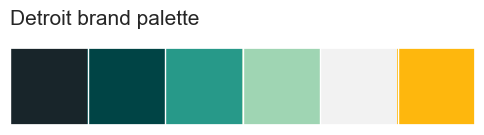

In [71]:
#### Call volume
sns.palplot(['#18252A','#004445', '#279989', '#9FD5B3','#F2F2F2','#feb70d'])

plt.title("Detroit brand palette ",loc='left',fontfamily='sans-serif',fontsize=15,y=1.2)
plt.show()

 A line chart or area chart showing the number of incidents over time (e.g., by day, week, month).

In [12]:

x_a= df_2024['month'].unique()



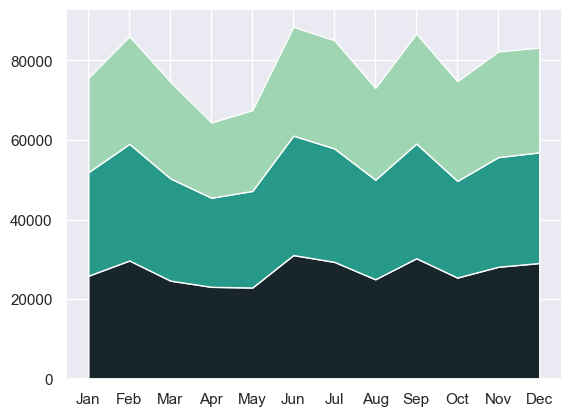

In [ ]:
sns.set_theme(style = 'darkgrid')
fig, ax = plt.subplots()

calls_2024= df_2024.groupby('month')['incident_id'].count()
calls_2022 = df_2022.groupby('month')['incident_id'].count()
calls_2023 = df_2023.groupby('month')['incident_id'].count()

#ax.plot(x,y)
ax.stackplot(x_a,
             calls_2024,calls_2023,calls_2022,
             colors=['#18252A','#279989', '#9FD5B3']
             )



In [57]:

df_merge_three = [calls_2024, calls_2023, calls_2022]

import functools as ft
df_final = ft.reduce(lambda left, right: pd.merge(left, right, on='month',how='left'), df_merge_three)


In [66]:
df_final['incident_id'].mean()

np.float64(24764.5)

In [67]:
average = (df_final['incident_id_x'].mean() + df_final['incident_id_y'].mean()+ df_final['incident_id'].mean())/3

In [69]:
average

np.float64(26148.666666666668)

In [94]:

colors = {'2022':'rgba(159, 213, 179, 1)','2023':'rgba(39, 153, 137, 1)','2024':'rgba(24, 37, 42, 1)','Average':'rgba(254, 183, 13, 1)'}
fig = go.Figure()
fig.add_trace(go.Bar(name="2022", x=x_a, y=calls_2022,marker_color=colors['2022']))
fig.add_trace(go.Bar(name="2023", x=x_a, y=calls_2023,marker_color=colors['2023']))
fig.add_trace(go.Bar(name="2024", x=x_a, y=calls_2024,marker_color=colors['2024']))
fig.update_layout(
    title = dict(text = "Call Volume Per Month",
                 font=dict(size=20, color="black")),
    xaxis_title="Month",
    yaxis_title="Number of calls", 
)
fig.add_shape(
    legendrank=1,
    name="Average",
    showlegend=True,
    type="line",
    xref="paper",
    line=dict(dash="5px",color=colors['Average']),
    label=dict(
        text="26148",
        textposition="start",
        font=dict(size=10, color="black"),
        yanchor="top"),
    x0=0.00,
    x1=1.0,
    y0=average,
    y1=average
)
fig.show()